
# Лабораторная работа 1 (fix 1)

## Выполнил: Морозов Алексей, группа М32071

## Вариант: 9, задачи 5,1


In [81]:
import numpy as np
import scipy as scp
# import matplotlib as mplt
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt


## Задача 1

### Условие

Исходное распределение имеет вид $X \sim \mathcal{U}\,[-2\theta, 3\theta],\, \theta \in (0,5)$
Экспериментальные значения параметров $\theta = 3, \varepsilon = 0.01, \delta = 0.05$
Требуется найти минимальный объем выборки $n$, при котором
\begin{equation}
    P(|\overline{X}-\mu_{\theta}|\leq\varepsilon)\geq 1-\delta
\end{equation}
Сгенерировать $500$ выборок найденного объема и посчитать, сколько раз выборочное среднее отличается от математического ожидания более чем на $\varepsilon$

In [82]:
eps = 0.01
delta = 0.05
theta = 3
a = -2 * theta
b = 3 * theta
gen_count = 500


### Решение

Центральная предельная теорема утверждает, что сумма $n$ независимых одинаково распределенных случайных величин имеет распределение, близкое к нормальному. Другими словами, закон распределения средней арифметической $\overline{X}$ первых $n$ величин, имеющих одинаковое математическое ожидание $\mu$ и дисперсию $\sigma^2$, при увеличении $n$ приближается к нормальному распределению $X \sim N\left(\mu, \frac{\sigma^2}{n}\right)$ с параметрами $\mu\left(\overline{X}\right)=\mu$ и $\sigma\left(\overline{X}\right)=\frac{\sigma}{\sqrt{n}}$

Учитывая это, можно использовать формулу для нормального распределения
\begin{equation}
    P(|\overline{X}-\mu|\leq\varepsilon)=2\Phi\left(\frac{\varepsilon}{\sigma\left(\overline{X}\right)}\right)
\end{equation}
где $\Phi\left(k\right)=l$ - функция Лапласа
Приравняв правые части формулы выше и исходного выражения, имеем
\begin{equation}
    2\Phi\left(\frac{\varepsilon}{\sigma\left(\overline{X}\right)}\right) = 1-\delta
\end{equation}
Подставим $\sigma\left(\overline{X}\right)$ и выразим искомую $n$
\begin{equation}
    2\Phi\left(\frac{\varepsilon\sqrt{n}}{\sigma}\right) = 1-\delta \\
    \Phi\left(\frac{\varepsilon\sqrt{n}}{\sigma}\right) = \frac{1-\delta}{2} \\
    \frac{\varepsilon\sqrt{n}}{\sigma} = \Phi^{-1}\left(\frac{1-\delta}{2}\right) \\
    n = \left(\frac{\sigma\Phi^{-1}\left(\frac{1-\delta}{2}\right)}{\varepsilon}\right)^2
\end{equation}
где $\Phi^{-1}\left(l\right) = k$ - такая функция, что $\Phi\left(k\right)=l$

Найдем искомый объем выборки

In [83]:
x_exp = (b + a) / 2
x_var = pow(b - a, 2) / 12
gen_size = round(pow((sqrt(x_var) * scp.special.ndtri(0.5 * (1 - delta) + 0.5)) / eps, 2))
print("Объем выборки:", gen_size)

Объем выборки: 720274


Сгенерируем необходимое число выборок этого объема и посчитаем, сколько раз выборочное среднее отличается от математического ожидания более чем на $\varepsilon$

In [84]:
counter = 0
for i in range(gen_count):
    gen_arr = scp.stats.uniform.rvs(loc=a, scale=b - a, size=gen_size)
    gen_mean = gen_arr.mean()
    if abs(gen_mean - x_exp) > 0.01:
        counter += 1
print(counter, "раз выборочное среднее отличается от математического ожидания более чем на", eps)


30 раз выборочное среднее отличается от математического ожидания более чем на 0.01



## Задача 2

### Условие

В файле $iris.csv$ представлены данные о параметрах различных экземплярах цветка ириса. Какой вид в датасете представлен больше всего, какой – меньше? Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и выборочную квантиль порядка $2/5$ для суммарной площади чашелистика и лепестка всей совокупности и отдельно для каждого вида. Построить график эмпирической функции распределения, гистограмму и $box-plot$ суммарной площади чашелистика и лепестка для всей совокупности и каждого вида

In [85]:
init_data = pd.read_csv('iris.csv')
init_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica



### Решение

Сначала найдем, какие виды представлены больше всего, а какие меньше

In [86]:
data = init_data.copy()
species = data['Species'].value_counts().sort_values(ascending=False)
print("Наиболее часто встречающиеся виды:", end=" ")
for i in species.index.values[species.values == species.iloc[0]]:
    print(i, end=", ")

print("\nНаименее часто встречающиеся виды:", end=" ")
for i in species.index.values[species.values == species.iloc[-1]]:
    print(i, end=", ")

Наиболее часто встречающиеся виды: setosa, versicolor, virginica, 
Наименее часто встречающиеся виды: setosa, versicolor, virginica, 

Добавим в таблицу суммарную площадь

In [87]:
data['Sum.Square'] = data['Sepal.Length'] * data['Sepal.Width'] + data['Petal.Length'] * data['Petal.Width']
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sum.Square
0,5.1,3.5,1.4,0.2,setosa,18.13
1,4.9,3.0,1.4,0.2,setosa,14.98
2,4.7,3.2,1.3,0.2,setosa,15.30
3,4.6,3.1,1.5,0.2,setosa,14.56
4,5.0,3.6,1.4,0.2,setosa,18.28
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,32.06
146,6.3,2.5,5.0,1.9,virginica,25.25
147,6.5,3.0,5.2,2.0,virginica,29.90
148,6.2,3.4,5.4,2.3,virginica,33.50


Сначала рассчитаем необходимые параметры и построим графики для каждого вида отдельно, а затем уже сделаем то же самое для всех видов вместе


#### Setosa

##### Среднее, дисперсия, медиана, квантиль


In [88]:
setosa_data = data[data['Species'] == 'setosa']

print("Выборочное среднее:", setosa_data['Sum.Square'].mean(),
"\nВыборочная дисперсия:", setosa_data['Sum.Square'].var(),
"\nВыборочная медиана:", setosa_data['Sum.Square'].median(),
"\nВыборочная квантиль порядка 2/5:", setosa_data['Sum.Square'].quantile(q=2/5))

Выборочное среднее: 17.623400000000004 
Выборочная дисперсия: 8.940059632653066 
Выборочная медиана: 17.66 
Выборочная квантиль порядка 2/5: 16.735999999999997



##### График эмпирической функции вероятности


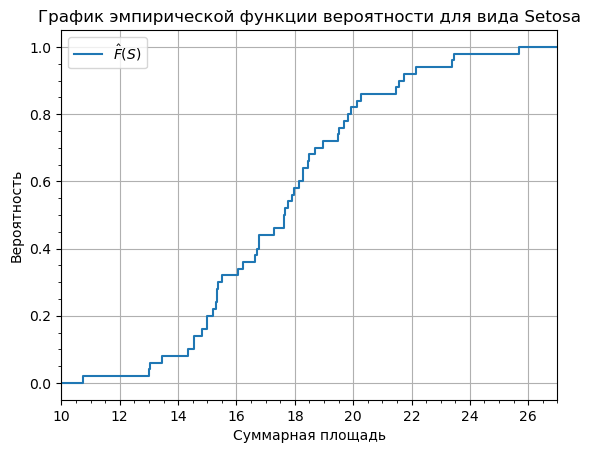

In [89]:
setosa_sample = setosa_data['Sum.Square'].values
x = np.sort(setosa_sample)
y = np.arange(1, len(x) + 1) / float(len(x))
x = np.insert(x, 0, round(x[0] - 1))
x = np.append(x, round(x[-1] + 1))
y = np.insert(y, 0, 0)
y = np.append(y, 1)

plt.title("График эмпирической функции вероятности для вида Setosa")
plt.xlabel("Суммарная площадь")
plt.ylabel("Вероятность")
plt.grid()
plt.minorticks_on()
plt.step(x, y, where='post')
plt.xlim(x[0], x[-1])
plt.legend(["$\hat{F}(S)$"])
plt.show()


##### Гистограмма суммарной площади


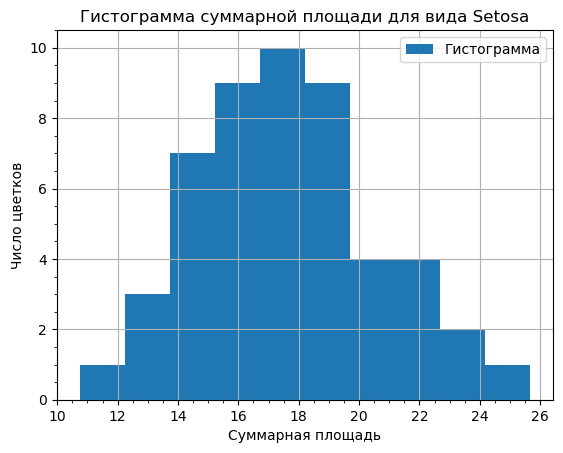

In [90]:
setosa_data['Sum.Square'].hist()
plt.title("Гистограмма суммарной площади для вида Setosa")
plt.xlabel("Суммарная площадь")
plt.ylabel("Число цветков")
plt.legend(["Гистограмма"])
plt.minorticks_on()
plt.show()


##### Box-plot суммарной площади


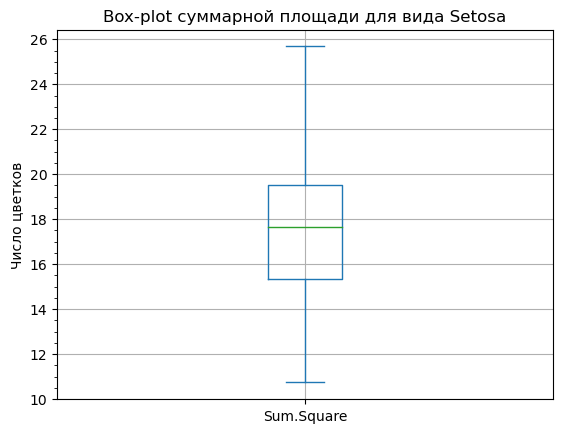

In [91]:
setosa_data['Sum.Square'].plot.box()
plt.title("Box-plot суммарной площади для вида Setosa")
plt.ylabel("Число цветков")
plt.grid()
plt.minorticks_on()
plt.show()


#### Versicolor

##### Среднее, дисперсия, медиана, квантиль


In [92]:
versicolor_data = data[data['Species'] == 'versicolor']
print("Выборочное среднее:", versicolor_data['Sum.Square'].mean(),
      "\nВыборочная дисперсия:", versicolor_data['Sum.Square'].var(),
      "\nВыборочная медиана:", versicolor_data['Sum.Square'].median(),
      "\nВыборочная квантиль порядка 2/5:", versicolor_data['Sum.Square'].quantile(q=2/5))

Выборочное среднее: 22.246600000000004 
Выборочная дисперсия: 15.834108612244895 
Выборочная медиана: 22.21 
Выборочная квантиль порядка 2/5: 21.142



##### График эмпирической функции вероятности


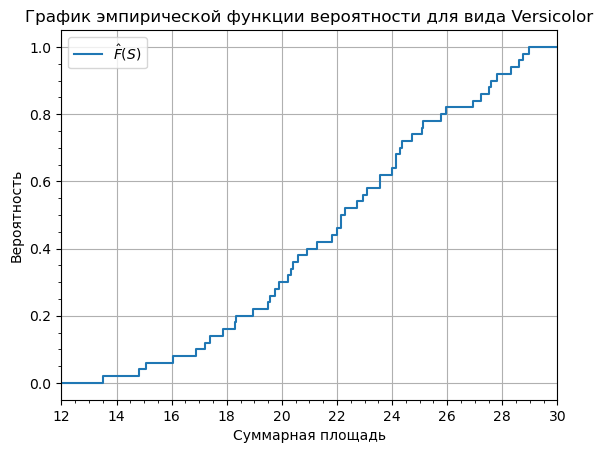

In [93]:
versicolor_sample = versicolor_data['Sum.Square'].values
x = np.sort(versicolor_sample)
y = np.arange(1, len(x) + 1) / float(len(x))
x = np.insert(x, 0, round(x[0] - 1))
x = np.append(x, round(x[-1] + 1))
y = np.insert(y, 0, 0)
y = np.append(y, 1)

plt.title("График эмпирической функции вероятности для вида Versicolor")
plt.xlabel("Суммарная площадь")
plt.ylabel("Вероятность")
plt.grid()
plt.minorticks_on()
plt.step(x, y, where='post')
plt.xlim(x[0], x[-1])
plt.legend(["$\hat{F}(S)$"])
plt.show()

##### Гистограмма суммарной площади

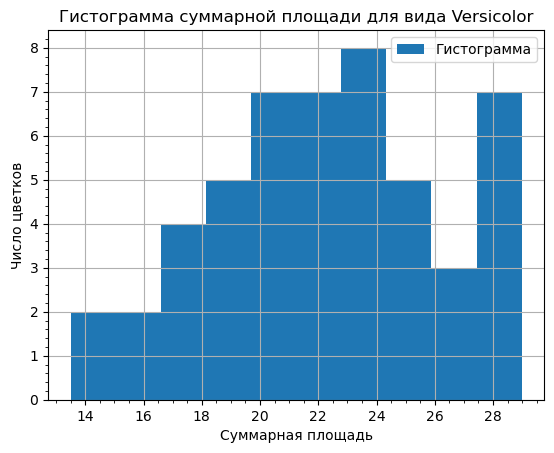

In [94]:
versicolor_data['Sum.Square'].hist()
plt.title("Гистограмма суммарной площади для вида Versicolor")
plt.xlabel("Суммарная площадь")
plt.ylabel("Число цветков")
plt.legend(["Гистограмма"])
plt.minorticks_on()
plt.show()

##### Box-plot суммарной площади

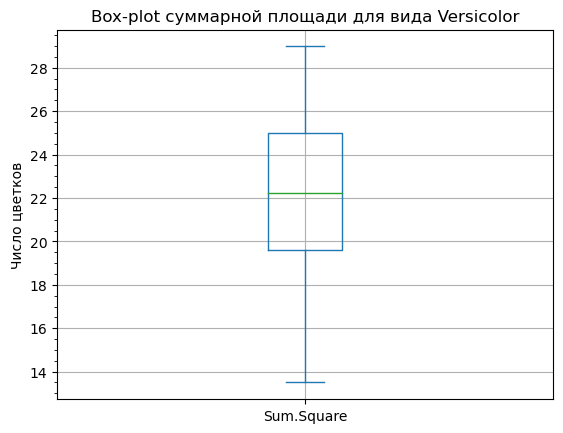

In [95]:
versicolor_data['Sum.Square'].plot.box()
plt.title("Box-plot суммарной площади для вида Versicolor")
plt.ylabel("Число цветков")
plt.grid()
plt.minorticks_on()
plt.show()


#### Virginica

##### Среднее, дисперсия, медиана, квантиль


In [96]:
virginica_data = data[data['Species'] == 'virginica']
print("Выборочное среднее:", virginica_data['Sum.Square'].mean(),
      "\nВыборочная дисперсия:", virginica_data['Sum.Square'].var(),
      "\nВыборочная медиана:", virginica_data['Sum.Square'].median(),
      "\nВыборочная квантиль порядка 2/5:", virginica_data['Sum.Square'].quantile(q=2/5))

Выборочное среднее: 30.9808 
Выборочная дисперсия: 27.00491771428571 
Выборочная медиана: 31.475 
Выборочная квантиль порядка 2/5: 29.716


##### График эмпирической функции вероятности

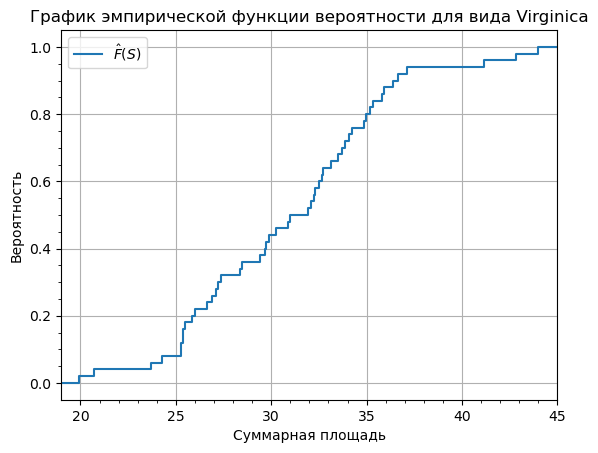

In [97]:
virginica_sample = virginica_data['Sum.Square'].values
x = np.sort(virginica_sample)
y = np.arange(1, len(x) + 1) / float(len(x))
x = np.insert(x, 0, round(x[0] - 1))
x = np.append(x, round(x[-1] + 1))
y = np.insert(y, 0, 0)
y = np.append(y, 1)

plt.title("График эмпирической функции вероятности для вида Virginica")
plt.xlabel("Суммарная площадь")
plt.ylabel("Вероятность")
plt.grid()
plt.minorticks_on()
plt.step(x, y, where='post')
plt.xlim(x[0], x[-1])
plt.legend(["$\hat{F}(S)$"])
plt.show()

##### Гистограмма суммарной площади

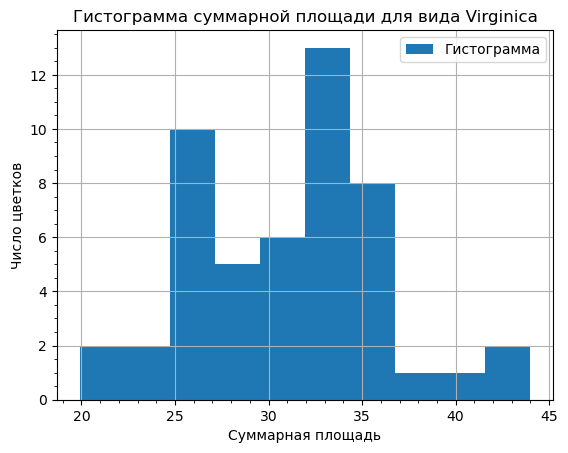

In [98]:
virginica_data['Sum.Square'].hist()
plt.title("Гистограмма суммарной площади для вида Virginica")
plt.xlabel("Суммарная площадь")
plt.ylabel("Число цветков")
plt.legend(["Гистограмма"])
plt.minorticks_on()
plt.show()

##### Box-plot суммарной площади

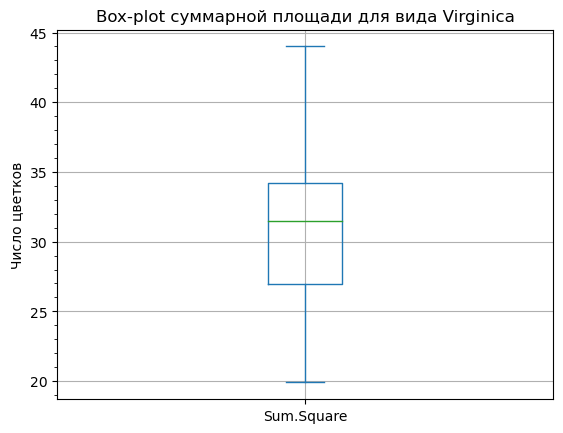

In [99]:
virginica_data['Sum.Square'].plot.box()
plt.title("Box-plot суммарной площади для вида Virginica")
plt.ylabel("Число цветков")
plt.grid()
plt.minorticks_on()
plt.show()


#### Все виды

##### Среднее, дисперсия, медиана, квантиль


In [100]:
print("Выборочное среднее:", data['Sum.Square'].mean(),
      "\nВыборочная дисперсия:", data['Sum.Square'].var(),
      "\nВыборочная медиана:", data['Sum.Square'].median(),
      "\nВыборочная квантиль порядка 2/5:", data['Sum.Square'].quantile(q=2/5))

Выборочное среднее: 23.616933333333332 
Выборочная дисперсия: 47.9094938881432 
Выборочная медиана: 22.5 
Выборочная квантиль порядка 2/5: 20.316000000000003



##### График эмпирической функции вероятности


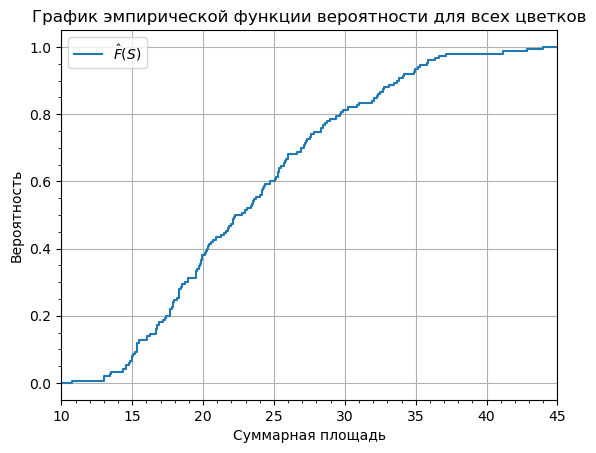

In [101]:
data_sample = data['Sum.Square'].values
x = np.sort(data_sample)
y = np.arange(1, len(x) + 1) / float(len(x))
x = np.insert(x, 0, round(x[0] - 1))
x = np.append(x, round(x[-1] + 1))
y = np.insert(y, 0, 0)
y = np.append(y, 1)

plt.title("График эмпирической функции вероятности для всех цветков")
plt.xlabel("Суммарная площадь")
plt.ylabel("Вероятность")
plt.grid()
plt.minorticks_on()
plt.step(x, y, where='post')
plt.xlim(x[0], x[-1])
plt.legend(["$\hat{F}(S)$"])
plt.show()


##### Гистограмма суммарной площади


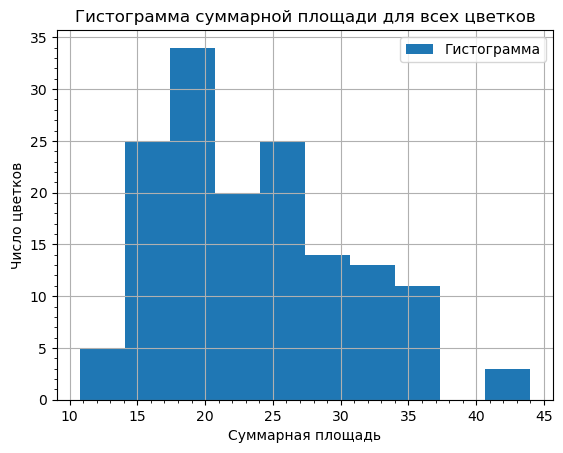

In [102]:
data['Sum.Square'].hist()
plt.title("Гистограмма суммарной площади для всех цветков")
plt.xlabel("Суммарная площадь")
plt.ylabel("Число цветков")
plt.legend(["Гистограмма"])
plt.minorticks_on()
plt.show()


##### Box-plot суммарной площади


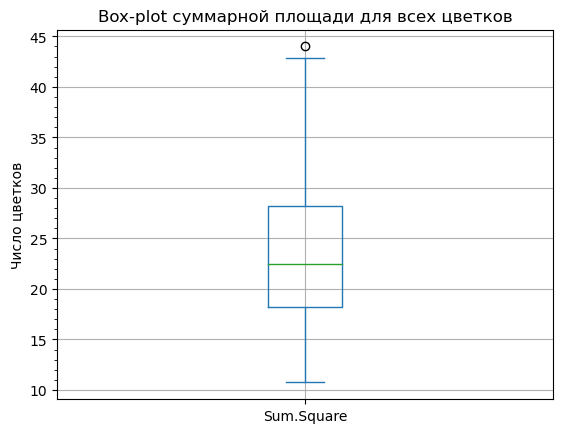

In [103]:
data['Sum.Square'].plot.box()
plt.title("Box-plot суммарной площади для всех цветков")
plt.ylabel("Число цветков")
plt.grid()
plt.minorticks_on()
plt.show()